# Clustering of timeseries data using pretrained models

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Aagam0812/DataMining/blob/main/Assignment10/Timeseries_clustering.ipynb)

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
# Let's start by loading the provided dataset to understand its structure and contents.
import pandas as pd

# Load the dataset
file_path = '/content/gdrive/MyDrive/DataMining/Electric_Production.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


The dataset contains two columns:

* DATE: Represents the date of electricity production.
* Value: Indicates the amount of electricity produced on that date.

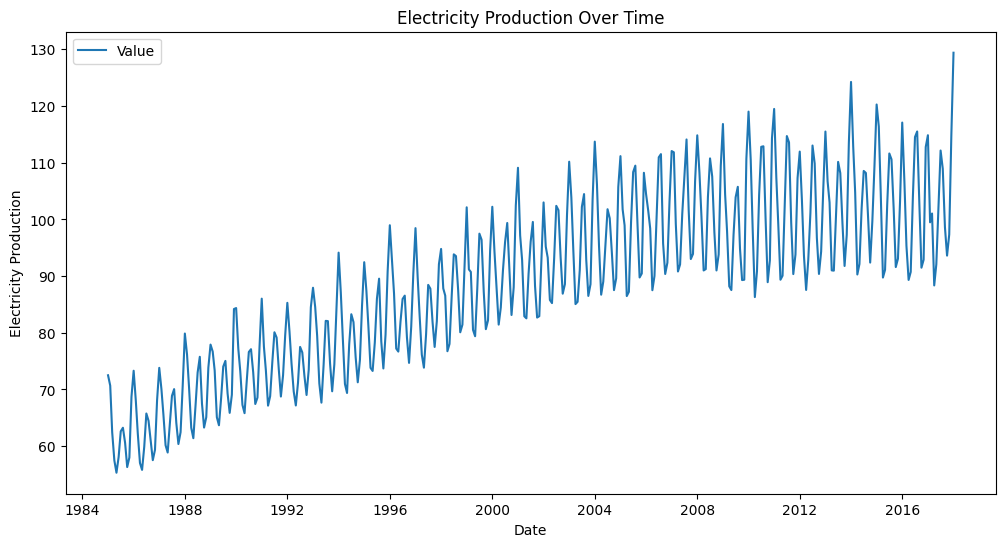

Value    0
dtype: int64

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'DATE' column to datetime
data['DATE'] = pd.to_datetime(data['DATE'])

# Set the 'DATE' column as the index
data.set_index('DATE', inplace=True)

# Check for missing values
missing_values = data.isnull().sum()

# Initial data visualization
plt.figure(figsize=(12, 6))
sns.lineplot(data=data)
plt.title('Electricity Production Over Time')
plt.ylabel('Electricity Production')
plt.xlabel('Date')
plt.show()

missing_values


* Converting the DATE column to a datetime format for proper time series analysis.
* Checking for missing values.
* Performing an initial data visualization to understand the trend and seasonality in the data.

The visualization shows the electricity production over time. There are several observations we can make from this plot:

* Trend: There seems to be an upward trend in the data, indicating an increase in electricity production over the years.
* Seasonality: The data exhibits clear seasonal patterns, which are typical in electricity consumption data.

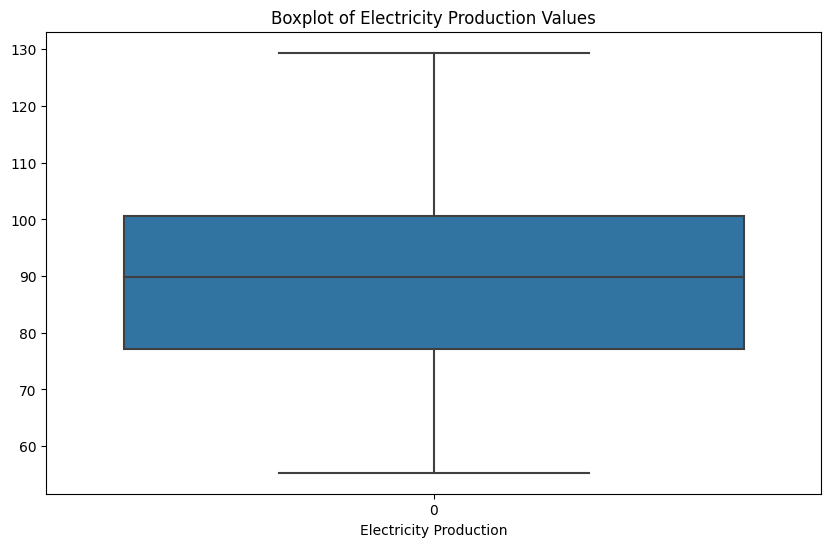

,Value,year,month,rolling_mean,rolling_std
DATE,,,,,
1985-01-01,72.5052,1985,1,NaN,NaN
1985-02-01,70.6720,1985,2,NaN,NaN
1985-03-01,62.4502,1985,3,NaN,NaN
1985-04-01,57.4714,1985,4,NaN,NaN
1985-05-01,55.3151,1985,5,NaN,NaN


In [4]:
# Check for outliers using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data['Value'])
plt.title('Boxplot of Electricity Production Values')
plt.xlabel('Electricity Production')
plt.show()

# Feature Engineering: Extracting year and month from the date
data['year'] = data.index.year
data['month'] = data.index.month

# Calculating rolling mean and standard deviation
data['rolling_mean'] = data['Value'].rolling(window=12).mean()
data['rolling_std'] = data['Value'].rolling(window=12).std()

# Displaying the first few rows of the modified dataset
data.head()


The boxplot does not show any significant outliers in the electricity production values, suggesting that the data is relatively clean in this aspect.

In terms of feature engineering, I've added the following features to the dataset:

* year: Extracted from the date, representing the year of production.
* month: Extracted from the date, representing the month of production.
* rolling_mean: A 12-month rolling mean of the electricity production, which can help in capturing the overall trend.
* rolling_std: A 12-month rolling standard deviation, capturing the variability over time.

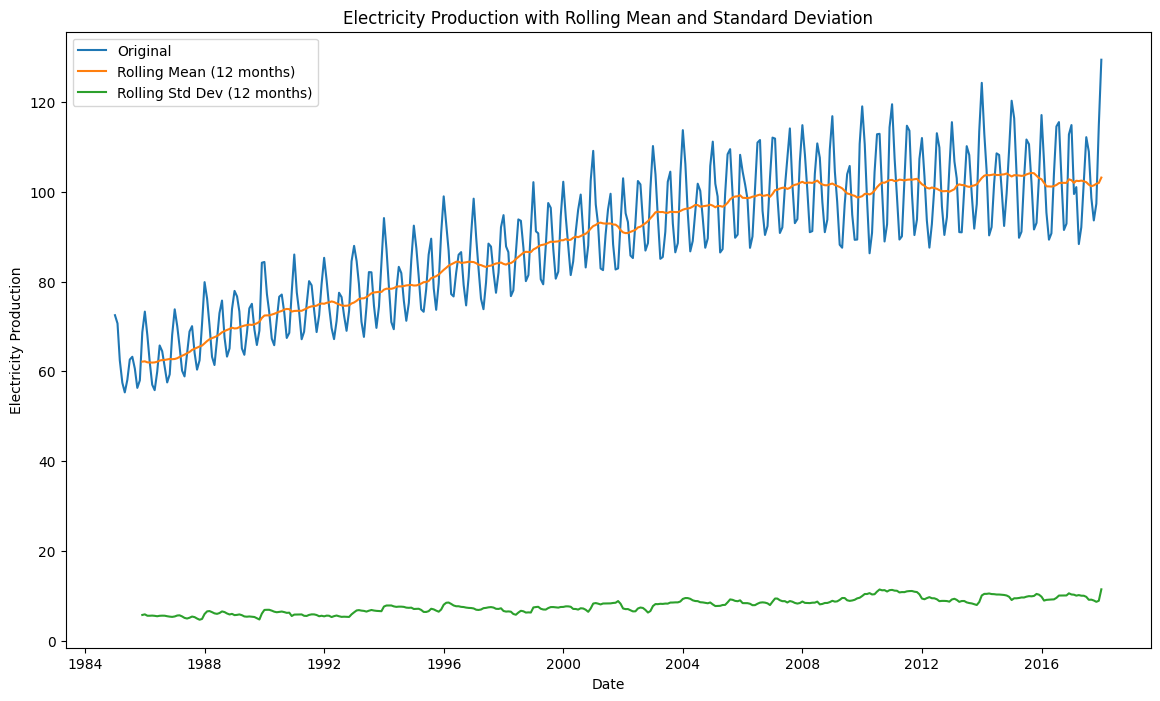

,Value,rolling_mean,rolling_std
0,-1.408817,-2.072657,-1.297129
1,-1.099485,-2.067495,-1.214954
2,-1.457840,-2.084809,-1.403357
3,-1.846244,-2.086280,-1.404126
4,-2.195867,-2.089108,-1.383487


In [8]:
# Detailed Data Visualization including rolling mean and standard deviation
plt.figure(figsize=(14, 8))

# Plotting original electricity production values
sns.lineplot(data=data['Value'], label='Original')

# Plotting rolling mean
sns.lineplot(data=data['rolling_mean'], label='Rolling Mean (12 months)')

# Plotting rolling standard deviation
sns.lineplot(data=data['rolling_std'], label='Rolling Std Dev (12 months)')

plt.title('Electricity Production with Rolling Mean and Standard Deviation')
plt.ylabel('Electricity Production')
plt.xlabel('Date')
plt.legend()
plt.show()

# Preparation for Clustering: Scaling the data
from sklearn.preprocessing import StandardScaler

# Dropping NaN values created by rolling functions
data_clustering = data.dropna()

# Selecting relevant features for clustering
features = ['Value', 'rolling_mean', 'rolling_std']

# Scaling the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clustering[features])

# Displaying first few rows of the scaled data
pd.DataFrame(data_scaled, columns=features).head()


The detailed visualization includes the original electricity production values along with the 12-month rolling mean and standard deviation. This graph provides a clearer picture of the trend and variability in the data over time.

For clustering:

The relevant features (Value, rolling_mean, rolling_std) have been scaled using a standard scaler. Scaling is essential for clustering algorithms, as it ensures that each feature contributes equally to the distance calculations.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

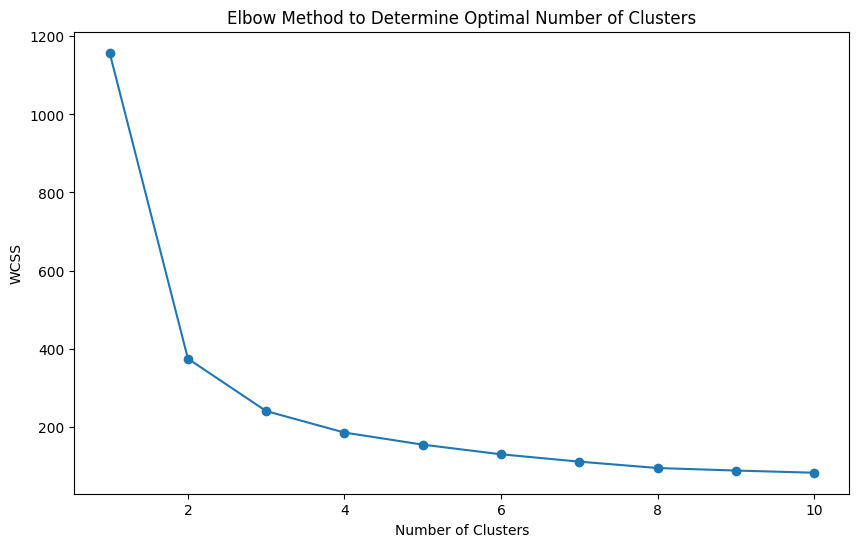

In [9]:
from sklearn.cluster import KMeans
import numpy as np

# Determining the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the results of the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-10-c93e39921eb0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clustering['Cluster'] = clusters


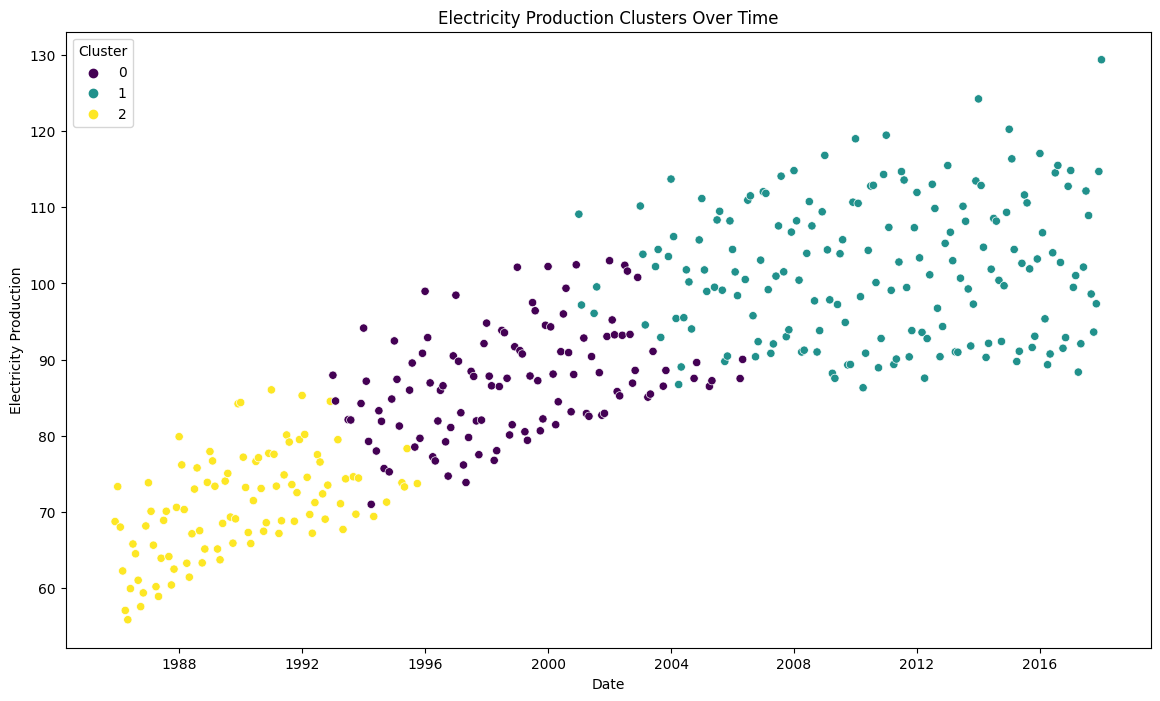

,Value,year,month,rolling_mean,rolling_std,Cluster
DATE,,,,,,
1985-12-01,68.7145,1985,12,62.165667,5.746613,2
1986-01-01,73.3057,1986,1,62.232375,5.880632,2
1986-02-01,67.9869,1986,2,62.008617,5.573367,2
1986-03-01,62.2221,1986,3,61.989608,5.572113,2
1986-04-01,57.0329,1986,4,61.953067,5.605773,2


In [10]:
# Clustering with K-Means using 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Adding the cluster information to the original dataframe
data_clustering['Cluster'] = clusters

# Visualizing the clusters
plt.figure(figsize=(14, 8))

# Scatter plot for clusters
sns.scatterplot(data=data_clustering, x=data_clustering.index, y='Value', hue='Cluster', palette='viridis')

plt.title('Electricity Production Clusters Over Time')
plt.ylabel('Electricity Production')
plt.xlabel('Date')
plt.legend(title='Cluster')
plt.show()

# Displaying the first few rows with the cluster assignments
data_clustering.head()
